In [12]:
import pandas as pd
URL = 'https://en.wikipedia.org/wiki/List_of_largest_banks'
tables = pd.read_html(URL)
df = tables[0]
print(df)

    Rank                                Bank name  \
0      1  Industrial and Commercial Bank of China   
1      2               Agricultural Bank of China   
2      3                  China Construction Bank   
3      4                            Bank of China   
4      5                           JPMorgan Chase   
..   ...                                      ...   
95    96                            Handelsbanken   
96    97                 Industrial Bank of Korea   
97    98                                      DNB   
98    99                      Qatar National Bank   
99   100                  National Bank of Canada   

    Total assets (2024) (US$ billion)  
0                             6303.44  
1                             5623.12  
2                             5400.28  
3                             4578.28  
4                             4002.81  
..                                ...  
95                             351.79  
96                             345.81  
97 

In [4]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Set up the web scraping request
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {'User-Agent': 'Mozilla/5.0'}

try:
    # 1. Fetch the webpage
    response = requests.get(url, headers=headers)
    response.raise_for_status()
    
    # 2. Parse HTML and find tables
    soup = BeautifulSoup(response.text, 'html.parser')
    tables = soup.find_all('table')
    
    # 3. Identify the correct table by its title
    for table in tables:
        if 'Tesla Quarterly Revenue' in str(table):
            tesla_revenue = pd.read_html(str(table))[0]
            break
    
    # 4. Clean and prepare the data
    tesla_revenue.columns = ['Date', 'Revenue']
    tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace(r'[$,]', '', regex=True)
    tesla_revenue['Revenue'] = pd.to_numeric(tesla_revenue['Revenue'], errors='coerce')
    tesla_revenue.dropna(inplace=True)
    
    # 5. Display the last 5 rows
    print("Last 5 rows of Tesla Revenue Data:")
    print(tesla_revenue.tail())
    
except Exception as e:
    print(f"Error occurred: {e}")

Last 5 rows of Tesla Revenue Data:
          Date  Revenue
58  2010-09-30     31.0
59  2010-06-30     28.0
60  2010-03-31     21.0
62  2009-09-30     46.0
63  2009-06-30     27.0


C:\Users\lamho\AppData\Local\Temp\ipykernel_17788\749076909.py:21: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tesla_revenue = pd.read_html(str(table))[0]


In [5]:
import yfinance as yf
import pandas as pd

# 1. Download GameStop stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

# 2. Reset the index and save to dataframe
gme_data.reset_index(inplace=True)

# 3. Display first 5 rows
print("First 5 rows of GameStop Stock Data:")
gme_data.head()

First 5 rows of GameStop Stock Data:


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662209,1.603296,1.662209,6892800,0.0,0.0


In [10]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Set up web scraping for GameStop revenue data
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {'User-Agent': 'Mozilla/5.0'}

try:
    # 1. Fetch webpage
    response = requests.get(url, headers=headers)
    response.raise_for_status()
    
    # 2. Parse HTML and find tables
    soup = BeautifulSoup(response.text, 'html.parser')
    tables = soup.find_all('table')
    
    # 3. Identify revenue table by its title
    for table in tables:
        if 'GameStop Quarterly Revenue' in str(table):
            gme_revenue = pd.read_html(str(table))[0]
            break
    
    # 4. Clean and format data
    gme_revenue.columns = ['Date', 'Revenue']
    gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace(r'[$,]', '', regex=True)
    gme_revenue['Revenue'] = pd.to_numeric(gme_revenue['Revenue'], errors='coerce')
    gme_revenue.dropna(inplace=True)
    
    # 5. Display last 5 rows
    print("Last 5 rows of GameStop Revenue Data:")
    print(gme_revenue.tail())
    
except Exception as e:
    print(f"Error occurred: {e}")

Last 5 rows of GameStop Revenue Data:
          Date  Revenue
61  2010-01-31     3524
62  2009-10-31     1835
63  2009-07-31     1739
64  2009-04-30     1981
65  2009-01-31     3492


C:\Users\lamho\AppData\Local\Temp\ipykernel_17788\1660497926.py:21: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  gme_revenue = pd.read_html(str(table))[0]


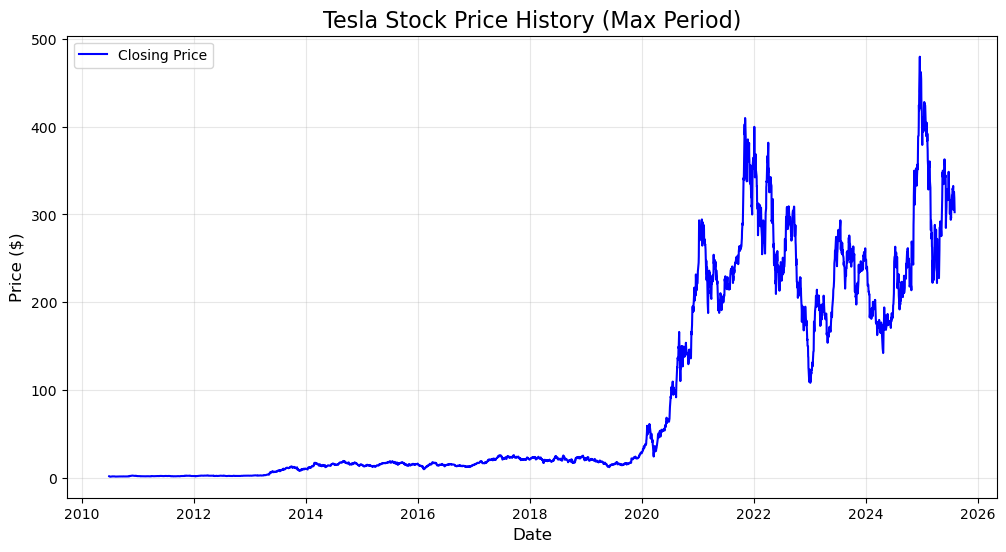

In [6]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# 1. Get Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)

# 2. Define the make_graph function
def make_graph(stock_data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data['Date'], stock_data['Close'], label='Closing Price', color='blue')
    plt.title(title, fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price ($)', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()

# 3. Plot Tesla stock data
make_graph(tesla_data, "Tesla Stock Price History (Max Period)")


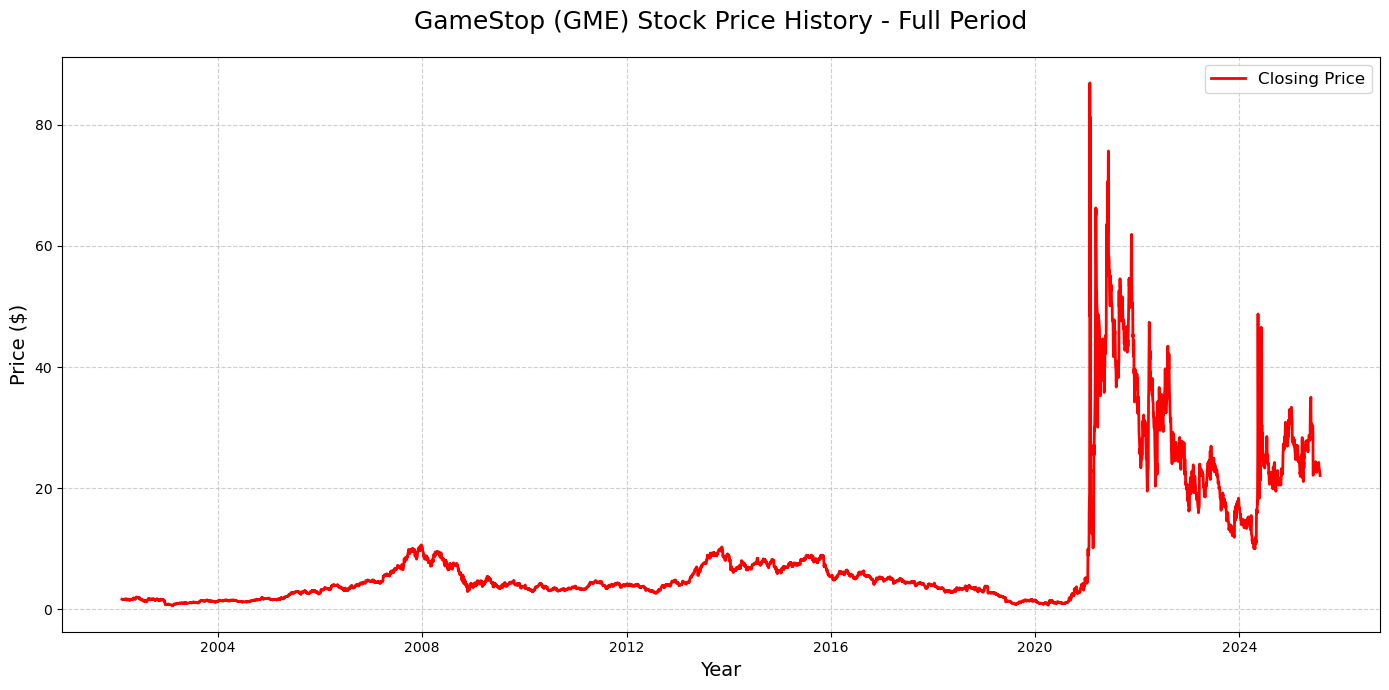

In [9]:
import yfinance as yf
import matplotlib.pyplot as plt

# 1. Get GameStop stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)

# 2. Use the make_graph function (same as Tesla)
def make_graph(stock_data, title):
    plt.figure(figsize=(14, 7))
    plt.plot(stock_data['Date'], stock_data['Close'], 
             label='Closing Price', 
             color='red',  # Changed to red for GameStop
             linewidth=2)
    plt.title(title, fontsize=18, pad=20)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Price ($)', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()

# 3. Plot GameStop stock data with title
make_graph(gme_data, "GameStop (GME) Stock Price History - Full Period")